In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from plotnine import *
import itertools
#from nilearn import image, plotting, datasets
#import nibabel as nib
import pdb
import os


In [3]:
study = "spaceloc"
subj_list = list(range(1001, 1013)) + list(range(2013,2019))
study_dir = f"/lab_data/behrmannlab/vlad/{study}"
fig_dir = f'/user_data/vayzenbe/GitHub_Repos/docnet/figures'
results_dir = f'/user_data/vayzenbe/GitHub_Repos/docnet/results'
rois = ['PPC_spaceloc', 'APC_spaceloc', 'LO_toolloc', 'PFS_toolloc']
roi_names = ['PPC', 'APC','LO', 'PFS']

exps = ['spaceloc', 'depthloc', 'distloc', 'toolloc', 'toolloc']
exp_conds = ['space', 'depth', 'dist', 'tool', 'object']
copes = [1, 1, 1, 1, 5]
suf = '_roi'

conds = ['space', 'feature', '3D', '2D', 'tool', 'non_tool', 'distance', 'luminance']
dorsal_conds = ['space', '3D', 'tool', 'distance']
cond_names = ['Space', 'Feature' ,'3D Shape', '2D Shape', 'Tools', 'Non-tools', 'Distance', 'Brightness']
file_suf = '_supp'

num_vox = 100

#template = datasets.load_mni152_template()

In [72]:
data_type = 'activations'
analysis = 'selectivity'
rois =  ['lPPC_spaceloc', 'lAPC_spaceloc','rPPC_spaceloc', 'rAPC_spaceloc']
roi_names = ['lpIPS', 'laIPS','rpIPS', 'raIPS']
dorsal_conds = ['space', 'distance', '3D', 'tool']
cond_names = ['Part Relations', 'Distance' ,'3D Shape','Tools']

all_roi_cols = []
for rr in rois:
    for cc in dorsal_conds:
        all_roi_cols.append(f'{rr}_{cc}')

all_roi_summary = pd.DataFrame(columns = all_roi_cols)
for rr in rois:
    
    for sub in enumerate(subj_list):
        
        sub_dir = f'{study_dir}/sub-spaceloc{sub[1]}/ses-01/derivatives'
        out_dir = f'{sub_dir}/results/beta_summary'
        
        if os.path.exists(f'{out_dir}/spaceloc{sub[1]}_{rr}_{data_type}.csv'):
            
            curr_sub = pd.read_csv(f'{out_dir}/spaceloc{sub[1]}_{rr}_{data_type}.csv')

            if curr_sub.shape[0] >= num_vox:
                curr_sub = curr_sub.iloc[0:num_vox,]
            
            curr_sub_means = curr_sub.mean()

            if sub[0] == 0:
                roi_summary = pd.DataFrame(columns= curr_sub_means.index)
            
            roi_summary = roi_summary.append(curr_sub_means, ignore_index= True)
        else:
            nan_list = np.empty((len(roi_summary.columns)))
            nan_list[:] = np.nan
            roi_summary = roi_summary.append(pd.Series(nan_list, index= roi_summary.columns), ignore_index=True)
            
    roi_summary = roi_summary.iloc[:,5:]
    roi_summary.to_csv(f"{results_dir}/{analysis}/{rr}_subj_summary_{data_type}{file_suf}.csv")
    

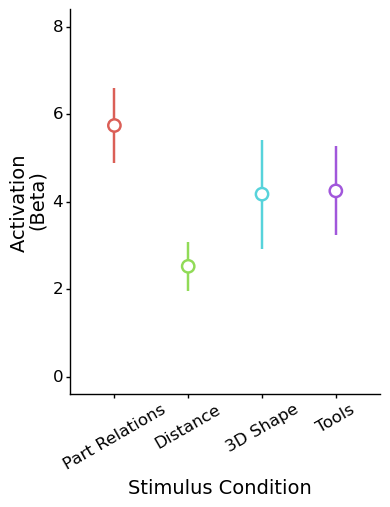

/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 4 x 5 in image.
/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /user_data/vayzenbe/GitHub_Repos/docnet/figures/selectivity/lPPC_spaceloc_selectivity_point_supp.png


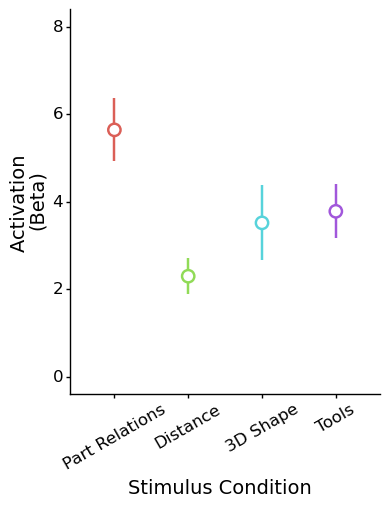

/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 4 x 5 in image.
/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /user_data/vayzenbe/GitHub_Repos/docnet/figures/selectivity/lAPC_spaceloc_selectivity_point_supp.png


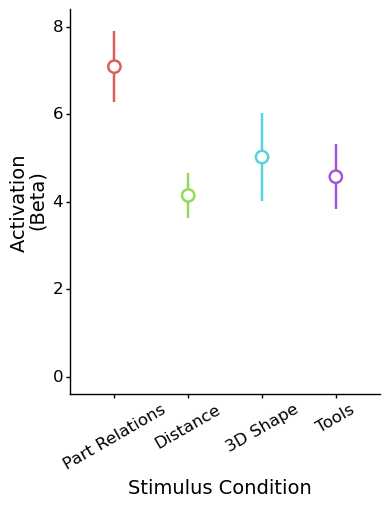

/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 4 x 5 in image.
/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /user_data/vayzenbe/GitHub_Repos/docnet/figures/selectivity/rPPC_spaceloc_selectivity_point_supp.png


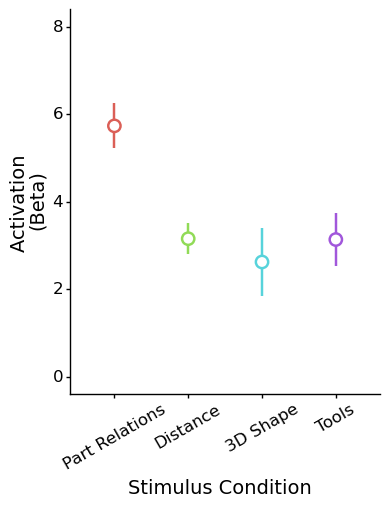

/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 4 x 5 in image.
/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /user_data/vayzenbe/GitHub_Repos/docnet/figures/selectivity/rAPC_spaceloc_selectivity_point_supp.png


In [73]:
"""
plot spaceloc selectivity
"""
analysis = 'selectivity'
rois =  ['lPPC_spaceloc', 'lAPC_spaceloc','rPPC_spaceloc', 'rAPC_spaceloc']
roi_names = ['lpIPS', 'laIPS','rpIPS', 'raIPS']
dorsal_conds = ['space', 'distance', '3D', 'tool']
cond_names = ['Part Relations', 'Distance' ,'3D Shape','Tools']

for rr in rois:
    #rr = 'rPPC_spaceloc'
    summary_df = pd.DataFrame(columns = ["Condition", "Beta", "SE"])
    summary_df['Condition'] = cond_names
    df = pd.read_csv(f"{results_dir}/{analysis}/{rr}_subj_summary_activations{file_suf}.csv")
    df = df[dorsal_conds]
    df.columns = cond_names
    summary_df['Beta'] = df.mean().to_list()
    summary_df['SE'] = df.sem().to_list()
    #cond_mean = df.mean()
    #cond_se = df.sem()
    df['sub'] = list(range(0,len(df)))
    df_melt = pd.melt(df,id_vars='sub',var_name = 'Condition',value_name ='Beta')

    summary_df['Condition'] = pd.Categorical(summary_df['Condition'], categories = cond_names, ordered = False)

    plot = ggplot(summary_df, aes(x='Condition', y='Beta',color = 'Condition')) + geom_linerange(aes(x='Condition',  ymax = f'Beta + SE', ymin = f'Beta - SE'), size = 1) + \
        geom_point(shape = 'o', size = 4, fill = 'White', stroke = 1) + ylim(0, 8) + \
        theme_classic() + xlab('Stimulus Condition') + ylab('Activation \n(Beta)') + \
            theme(text = element_text(color ='black'), axis_text_x= element_text(angle = 30, size = 12),axis_text_y= element_text(size = 12),axis_title=element_text(size = 14),
                                                                            axis_line=element_line(), 
                                                                            panel_border=element_blank(),
                                                                            legend_position = "none",
                                                                            figure_size = (4, 5))

    print(plot)
    plot.save(f'{fig_dir}/{analysis}/{rr}_selectivity_point{file_suf}.png', width=4, height=5, dpi = 300)





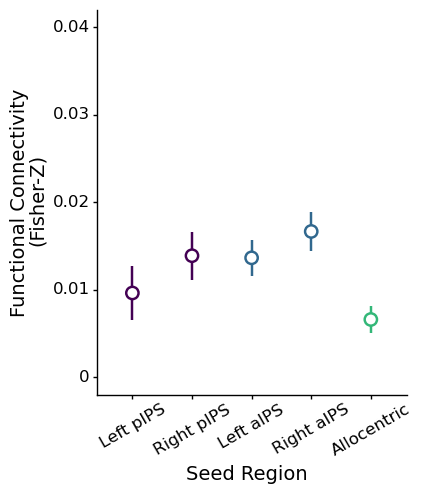

/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 4 x 5 in image.
/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /user_data/vayzenbe/GitHub_Repos/docnet/figures/ppi/lLO_toolloc_ppi_point_supp.png


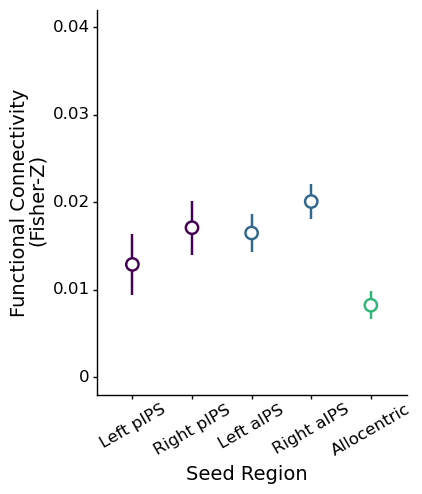

/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 4 x 5 in image.
/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /user_data/vayzenbe/GitHub_Repos/docnet/figures/ppi/rLO_toolloc_ppi_point_supp.png


In [6]:
"""
plot PPI
"""
analysis = 'ppi'
dorsal_rois =  ['lPPC_spaceloc', 'rPPC_spaceloc','lAPC_spaceloc', 'rAPC_spaceloc', 'lAPC_distloc']
ventral_rois = ['lLO_toolloc', 'rLO_toolloc']
roi_names = ['Left pIPS', 'Right pIPS', 'Left aIPS','Right aIPS', 'Allocentric']
roi_pos = ['posterior', 'posterior', 'anterior', 'anterior', 'Distance']

for rr in ventral_rois:

    summary_df = pd.DataFrame(columns = ["ROI",'LOC' "FC", "SE"])
    summary_df['ROI'] = roi_names
    summary_df['LOC'] = roi_pos

    df = pd.read_csv(f"{results_dir}/{analysis}/{rr}_fc{file_suf}.csv")
    df = df[dorsal_rois]
    #df.columns = cond_names
    summary_df['FC'] = df.mean().to_list()
    summary_df['SE'] = df.sem().to_list()

    summary_df['ROI'] = pd.Categorical(summary_df['ROI'], categories = roi_names, ordered = False)

    plot = ggplot(summary_df, aes(x='ROI', y='FC',color = 'LOC')) + geom_linerange(aes(x='ROI',  ymax = f'FC + SE', ymin = f'FC - SE'), size = 1) + \
            geom_point(shape = 'o', size = 4, fill = 'White', stroke = 1) + ylim(0, .04) + \
            theme_classic() + xlab('Seed Region') + ylab('Functional Connectivity \n(Fisher-Z)') + \
                scale_color_manual(values = [ '#33B778', '#31688E','#440154']) + \
                theme(text = element_text(color ='black'), axis_text_x= element_text(angle = 30, size = 12),axis_text_y= element_text(size = 12),axis_title=element_text(size = 14),
                                                                                axis_line=element_line(), 
                                                                                panel_border=element_blank(),
                                                                                legend_position = "none",
                                                                                figure_size = (4, 5))

    print(plot)
    plot.save(f'{fig_dir}/{analysis}/{rr}_ppi_point{file_suf}.png', width=4, height=5, dpi = 300)

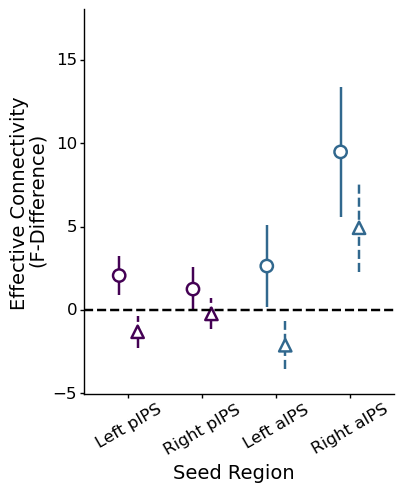

/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 4 x 5 in image.
/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /user_data/vayzenbe/GitHub_Repos/docnet/figures/gca/lLO_gca_supp.png


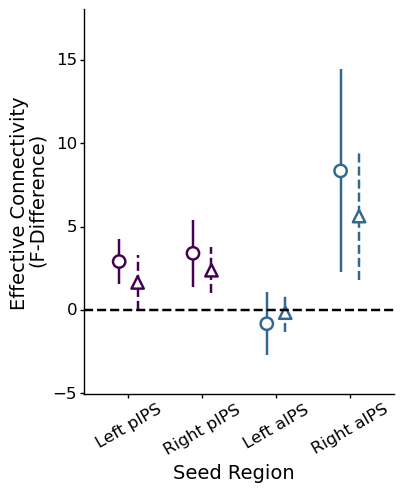

/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 4 x 5 in image.
/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /user_data/vayzenbe/GitHub_Repos/docnet/figures/gca/rLO_gca_supp.png


In [17]:
"""
Create SpaceLoc GCA plot
"""
analysis = 'gca'
df = pd.read_csv(f"{results_dir}/{analysis}/all_roi_summary{file_suf}.csv")

tsk = 'spaceloc'
dorsal_rois =  ['lPPC', 'rPPC','lAPC', 'rAPC']
ventral_rois = ['lLO', 'rLO']
conds = ['SA','FT']
cond_names = ['Relations', 'Features','Relations', 'Features','Relations', 'Features','Relations', 'Features']
cond_names_cat = ['Relations', 'Features']
roi_names = ['Left pIPS','Left pIPS', 'Right pIPS', 'Right pIPS', 'Left aIPS','Left aIPS','Right aIPS','Right aIPS']
roi_names_cat = ['Left pIPS', 'Right pIPS', 'Left aIPS','Right aIPS']
roi_pos = ['posterior', 'posterior','posterior', 'posterior', 'anterior', 'anterior', 'anterior', 'anterior']

summary_df = pd.DataFrame(columns = ["ROI",'LOC', "COND", "GC", "SE"])
summary_df['ROI'] = roi_names
summary_df['LOC'] = roi_pos
summary_df['COND'] = cond_names


for vr in ventral_rois:
    roi_means = []
    roi_sems = []
    for dr in dorsal_rois:
        for cc in conds:
            roi_means.append(df[f'{tsk}_{cc}_{dr}_{vr}'].mean())
            roi_sems.append(df[f'{tsk}_{cc}_{dr}_{vr}'].sem())

    summary_df['GC'] = roi_means
    summary_df['SE'] = roi_sems

    summary_df['ROI'] = pd.Categorical(summary_df['ROI'], categories = roi_names_cat, ordered = False)
    summary_df['COND'] = pd.Categorical(summary_df['COND'], categories = cond_names_cat, ordered = False)


    plot = ggplot(summary_df, aes(x='ROI', y='GC',color = 'LOC')) + geom_linerange(aes(x='ROI',  ymax = 'GC + SE', ymin = 'GC - SE', linetype = 'COND'), size = 1,position=position_dodge2(width=.5)) + \
            geom_point(aes(shape = 'COND'), size = 4, fill = 'White', stroke = 1,position=position_dodge2(width=.5)) + ylim(-4, 17) + \
            scale_color_manual(values = [ '#31688E','#440154']) + \
            theme_classic() + xlab('Seed Region') + ylab('Effective Connectivity \n(F-Difference)') + \
                geom_hline(yintercept=0,linetype='dashed', size = 1) + \
                theme(text = element_text(color ='black'), axis_text_x= element_text(angle = 30, size = 12),axis_text_y= element_text(size = 12),axis_title=element_text(size = 14),
                                                                                axis_line=element_line(), 
                                                                                panel_border=element_blank(),
                                                                                figure_size = (4, 5),
                                                                                legend_position = "none")

    print(plot)
    plot.save(f'{fig_dir}/{analysis}/{vr}_gca{file_suf}.png', width=4, height=5, dpi = 300)



In [16]:
df = pd.read_csv(f"{results_dir}/{analysis}/all_roi_summary{file_suf}.csv")
df

,sub,spaceloc_SA_lPPC_lLO,spaceloc_SA_lPPC_rLO,spaceloc_SA_rPPC_lLO,spaceloc_SA_rPPC_rLO,spaceloc_SA_lAPC_lLO,spaceloc_SA_lAPC_rLO,spaceloc_SA_rAPC_lLO,spaceloc_SA_rAPC_rLO,spaceloc_FT_lPPC_lLO,...,distloc_SA_rAPC_lLO,distloc_SA_rAPC_rLO,distloc_FT_lPPC_lLO,distloc_FT_lPPC_rLO,distloc_FT_rPPC_lLO,distloc_FT_rPPC_rLO,distloc_FT_lAPC_lLO,distloc_FT_lAPC_rLO,distloc_FT_rAPC_lLO,distloc_FT_rAPC_rLO
0,1001.0,-1.873104,0.752183,-9.505855,-16.597022,-4.346467,-3.907604,-7.456737,-12.326583,1.730560,...,-0.058506,-1.711557,1.874558,-3.796634,0.293577,-4.108035,0.660963,1.468416,0.480265,-0.099720
1,1002.0,1.758033,4.237531,1.402780,6.216129,5.208808,4.892023,7.190719,7.603298,-3.250432,...,1.322719,2.259372,-0.215619,-2.359455,4.336681,-2.137342,-1.167540,3.426079,-3.177940,2.171487
2,1003.0,-3.692928,6.829635,3.186759,15.325557,-7.755750,1.245535,11.702846,28.652942,-9.556254,...,23.174456,41.321842,1.232093,14.563363,2.413655,-0.966872,-7.747598,3.478826,8.265674,31.975811
3,1004.0,14.004525,9.318416,9.242172,6.835050,20.057374,10.934014,39.705123,33.223473,3.465250,...,36.049764,36.647365,-1.740881,-8.616745,-0.271013,-1.261570,10.889873,14.507923,15.873279,21.410454
4,1005.0,1.725618,-1.431852,-4.849746,1.539730,15.471232,15.609482,35.181659,54.295328,-3.481816,...,-1.792279,-2.974700,20.597790,23.313642,0.072424,-0.676839,-3.828031,-8.253756,0.957769,0.283270
5,1006.0,-2.534170,0.111521,-1.797890,1.094037,-2.835700,0.269685,-2.579851,0.754771,-2.017286,...,-2.840993,1.585722,-0.531856,-0.152195,0.354879,2.599237,-0.616918,-0.090935,-0.761344,1.379222
6,1007.0,1.857997,0.851778,1.418917,2.631643,-4.248176,-2.432318,-8.906016,-4.675431,-4.715942,...,1.142294,6.393034,-0.979171,0.698405,-2.530574,-1.314235,-1.445463,0.356608,0.062347,0.794421
7,1008.0,3.952151,1.477473,9.609627,3.080218,7.552901,-0.999531,9.191373,-4.251746,-0.068184,...,8.482999,-7.373580,-1.405202,0.976603,-0.073997,-0.110894,-4.358955,-10.178400,-2.807129,-8.521488
8,1009.0,5.724674,2.691220,-1.032364,0.288464,0.713831,-2.846854,12.961357,26.486364,-7.687630,...,-8.540873,-2.166716,29.443419,22.948196,39.533585,29.495628,10.803374,3.784288,-3.300450,3.202110
9,1010.0,7.156782,10.345441,9.030663,12.975189,-7.426774,-14.002724,1.028423,-0.744171,2.333015,...,17.272027,16.725109,8.691099,6.608285,13.242812,12.641265,15.803860,12.309736,14.881782,7.872730


In [ ]:
# create a figure with multiple axes to plot each anatomical image
def plot_glass_brain(subs, exp):
    fig, axes = plt.subplots(nrows=len(all_subs), ncols=1, figsize=(9, 25))


    # axes is a 2 dimensional numpy array
    for axn, ax in enumerate(axes.flatten()):
        display = plotting.plot_glass_brain(all_subs[axn], axes=ax, threshold = 3.1, draw_cross = False, colorbar = True)

        ax.title.set_text(f'Subject {axn + 1}')

    plt.show()
    display.savefig(f'{fig_dir}/{exp}_glassbrain.png')   
    plt.pause(0.0001)

    # save the output figure with all the anatomical images
    #fig.savefig("my_test_img.png")

In [ ]:
"""
Plot glass brain 
"""
for exn, exp in enumerate(exps):
    all_subs = []
    for ss in subj_list:
        stats_dir = f'{study_dir}/sub-{study}{ss}/ses-01/derivatives/fsl/{exp}/HighLevel{suf}.gfeat'
        curr_sub = image.load_img(f'{stats_dir}/cope{copes[exn]}.feat/stats/zstat1.nii.gz') # load image
        
        affine = curr_sub.affine #extract original affine
        curr_sub = image.get_data(curr_sub) #convert to numpy
        
        
        curr_sub[curr_sub[:,:,:] <=0] = 0 #zero out anything negative
        #cluster_mask = image.get_data(image.load_img(f'{stats_dir}/cope{copes[exn]}.feat/stats/zstat1.nii.gz')) #load cluster corrected mask as numpy array
        
        #curr_sub = curr_sub * cluster_mask #mask with cluster-correction
        curr_sub = nib.Nifti1Image(curr_sub, affine) #convert back to volume
        curr_sub = image.resample_to_img(curr_sub, template) #resample to MNI
        all_subs.append(curr_sub)
    
    print(exp)    
    plot_glass_brain(all_subs, exp_conds[exn])
    
    
        